# 5P30 Final Project

Nazanin Mehregan - 7549975

### Creating the Graph according to dataset

In [3]:
import networkx as nx
import numpy as np
import pandas as pd

# Create an empty graph
G = nx.Graph()
df = pd.read_csv('dataset\\13_tracks.csv') # load your dataframe
df = df[df['frame'] == 1]

# Clustering code goes here...

df.to_csv('dataset\\output.csv', index=False)


df = df.reset_index(drop=True)

# iterate through rows and add nodes to the graph
for i in range(len(df)):
    G.add_node(i, x=df.loc[i, 'x'], y=df.loc[i, 'y'], width=df.loc[i, 'width'], height=df.loc[i, 'height'], xVelocity=df.loc[i, 'xVelocity'], yVelocity=df.loc[i, 'yVelocity'], xAcceleration=df.loc[i, 'xAcceleration'], yAcceleration=df.loc[i, 'yAcceleration'])
df


,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,41.84,18.04,4.65,2.12,-27.81,0.08,0.15,-0.01,...,0.00,0,7,0,0,2,0,3,14,3
1,1,2,54.31,22.10,4.75,1.82,-35.23,-0.09,0.85,0.00,...,0.00,0,6,0,0,0,1,0,7,4
2,1,3,33.24,14.00,11.52,2.50,-22.58,-0.00,0.00,-0.00,...,0.00,0,14,0,1,7,0,0,0,2
3,1,4,316.48,31.33,4.55,1.72,34.62,-0.00,0.32,-0.00,...,0.00,0,9,0,0,0,0,5,10,6
4,1,5,316.52,35.45,5.15,1.92,30.74,0.18,0.13,-0.00,...,0.00,0,10,0,4,9,0,0,13,7
5,1,6,102.61,21.95,4.65,2.22,-32.49,-0.17,0.09,0.01,...,-35.23,2,8,0,0,0,1,0,7,4
6,1,7,136.44,18.30,4.75,2.02,-29.06,0.00,-0.48,0.00,...,-27.81,1,15,6,0,8,3,0,14,3
7,1,8,160.95,22.29,4.65,1.92,-31.24,0.09,-0.31,-0.00,...,-32.49,6,18,0,0,0,7,0,15,4
8,1,9,229.77,31.12,4.55,1.82,33.38,-0.00,0.35,-0.00,...,34.62,4,11,0,0,0,10,0,12,6
9,1,10,235.19,34.86,5.05,1.92,29.52,0.09,0.29,-0.00,...,30.74,5,12,4,0,9,13,0,26,7


### Adding Nodes & Assigning Weights (Forces) to Edges

In [310]:
import random
G = nx.Graph()

# add nodes to the graph with their features
for i, row in df.iterrows():
    G.add_node(i, **row.to_dict())

print(G.nodes)
# add edges to the graph G
for i in range(len(df)):
    distances = []
    for j in range(len(df)):
        if i != j:
            distance = np.sqrt((df.iloc[j]['x']-df.iloc[i]['x'])**2 + (df.iloc[j]['y']-df.iloc[i]['y'])**2)
            distances.append((distance, j))
    distances.sort()
    for k in range(min(3, len(distances))):
        G.add_edge(i, distances[k][1], weight=round(np.random.uniform(low=1, high=5), 0))

# print the graph
print(G.edges)
print(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 2), (0, 1), (0, 23), (0, 27), (1, 23), (1, 30), (2, 23), (2, 27), (3, 4), (3, 29), (3, 28), (4, 29), (4, 28), (5, 18), (5, 24), (5, 22), (6, 13), (6, 20), (6, 25), (6, 16), (7, 15), (7, 13), (7, 16), (8, 9), (8, 19), (8, 11), (8, 10), (9, 19), (9, 12), (9, 17), (9, 26), (10, 11), (10, 14), (10, 19), (10, 21), (11, 14), (12, 17), (12, 26), (13, 16), (13, 15), (14, 21), (15, 21), (17, 26), (18, 20), (18, 25), (20, 25), (22, 24), (22, 30), (23, 27), (23, 30), (24, 30), (28, 31), (28, 29), (28, 32), (28, 33), (29, 31), (31, 32), (31, 33), (32, 33)]
Graph with 34 nodes and 59 edges


### Plotting the Graph

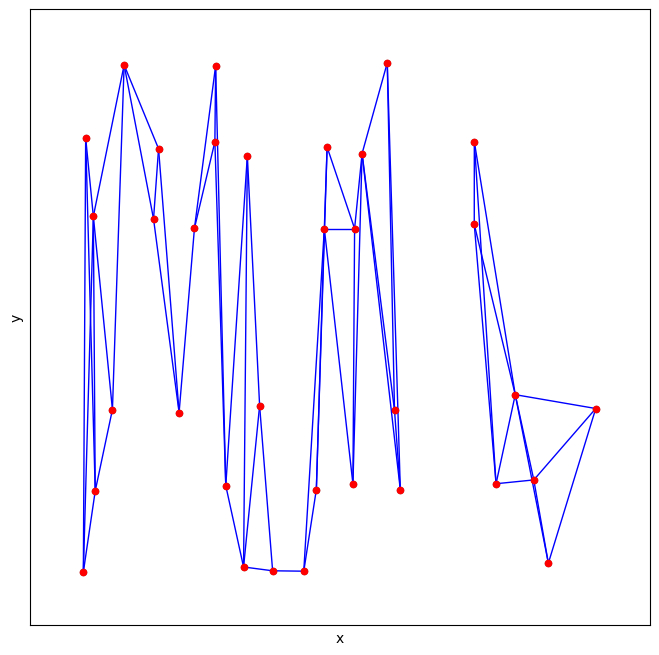

In [311]:
from matplotlib import pyplot as plt

X = df[['x', 'y']].values

# create a layout for the graph nodes
pos = dict(zip(range(len(df)), X))

# draw the graph
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['x'], df['y'], s=20, color='gray')
nx.draw_networkx_nodes(G, pos, node_color='r', node_size=20, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='b', ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

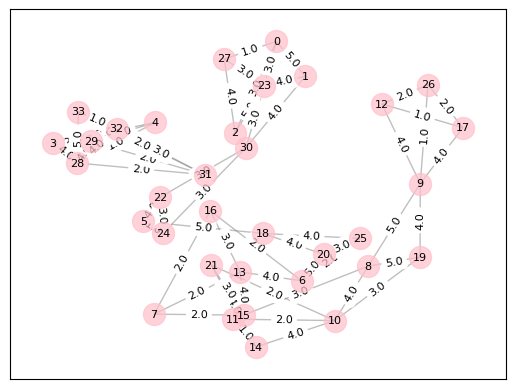

In [325]:
import networkx as nx
import matplotlib.pyplot as plt

# generate a layout for the graph nodes
pos = nx.spring_layout(G, k=1.1, iterations=50, seed=42)

# draw the nodes of the graph
nx.draw_networkx_nodes(G, pos, node_size=250, node_color='pink', alpha=0.7, edgecolors='pink')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

# draw the edges of the graph
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# get the edge weights as a dictionary
edge_labels = nx.get_edge_attributes(G, 'weight')

# draw the edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# display the graph

plt.show()


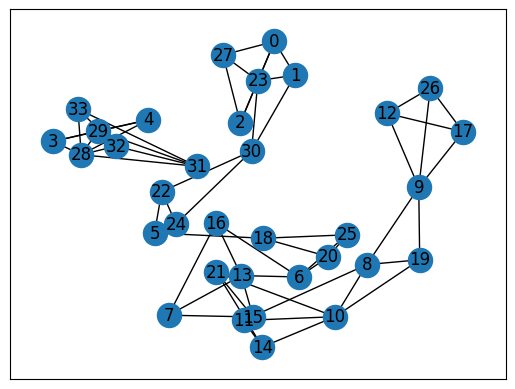

In [443]:
# specify node positions
pos = nx.spring_layout(G,k=1, iterations=50, seed=42) 

# draw nodes
nx.draw_networkx_nodes(G, pos) 

# draw node labels
nx.draw_networkx_labels(G, pos)

# draw edges
nx.draw_networkx_edges(G, pos)  


plt.show() 

In [329]:
print(G)

Graph with 34 nodes and 59 edges


### Approach #1 - K-means clustering

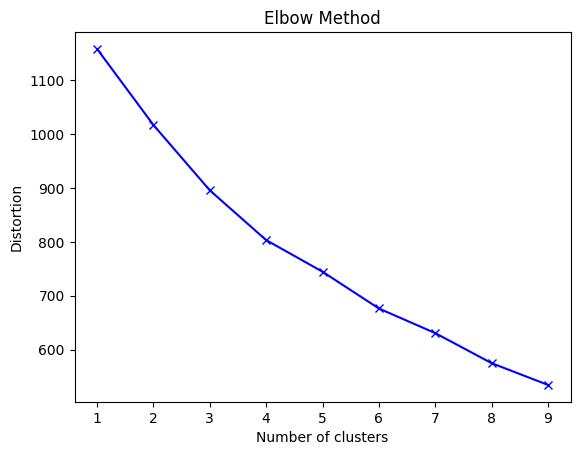

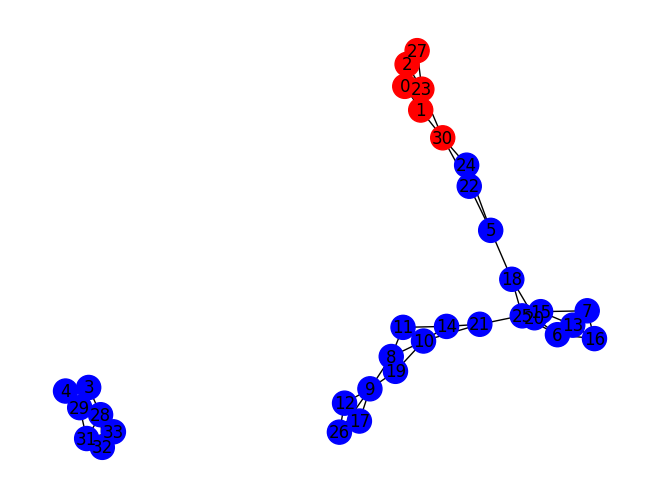

In [362]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Get the adjacency matrix of the graph
A = nx.adjacency_matrix(G).todense()

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(A)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
optimal_K = 2

# Run K-means clustering on the adjacency matrix
kmeans = KMeans(n_clusters=optimal_K).fit(A)

# Assign the nodes to the corresponding clusters
clusters = kmeans.labels_


colors = ["red" if c == 0 else "blue" if c == 1 else "green" for c in clusters]

# Plot the graph with the nodes colored based on the clusters
nx.draw(G, with_labels=True, node_color=colors)
plt.show()


### Approach #2 - Spectral clustering

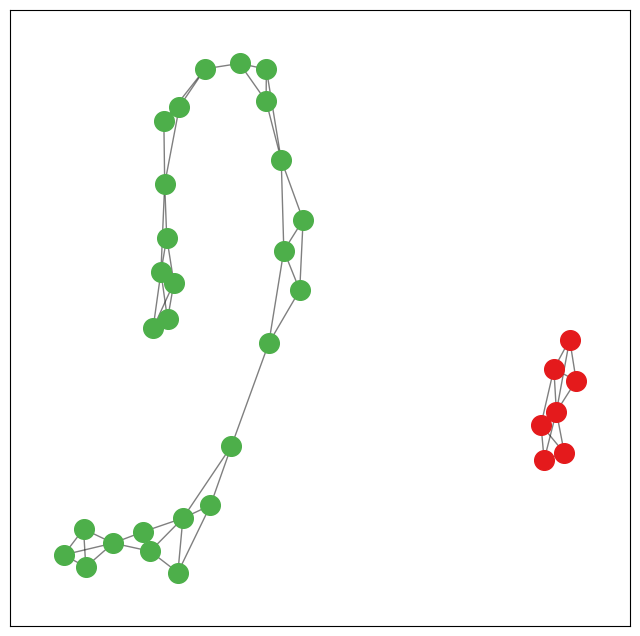

In [369]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Compute the Laplacian matrix
A = nx.to_numpy_array(G)
D = np.diag(np.sum(A, axis=1))
L = D - A

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(L)

# Sort the eigenvalues and corresponding eigenvectors in ascending order
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Use the first two eigenvectors to create the embedding matrix
embedding = np.column_stack((eigenvectors[:,0], eigenvectors[:,1]))

# Apply K-means clustering on the embedding matrix
kmeans = KMeans(n_clusters=2).fit(embedding)

# Assign the nodes to the corresponding clusters
clusters = kmeans.labels_

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
for i, cluster in enumerate(clusters):
    color = plt.cm.Set1(cluster / 4.)
    nx.draw_networkx_nodes(G, pos, [i], node_size=200, node_color=color)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


### Approach #3 - GCN and Sage Implementation

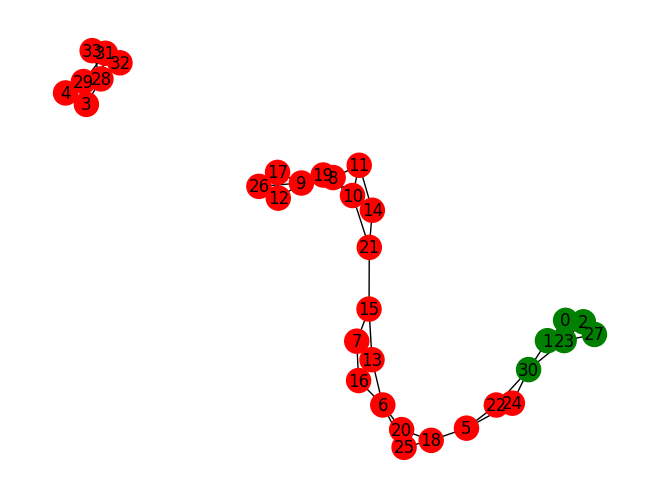

In [436]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import from_networkx
import torch
import matplotlib.pyplot as plt


# Create feature vectors for each node
num_nodes = G.number_of_nodes()
features = torch.eye(num_nodes)

# Convert the NetworkX graph to a PyTorch-Geometric Data object
data = from_networkx(G)

# Define the Graph SAGE model
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()

        # Define the first Graph SAGE layer
        self.conv1 = SAGEConv(in_channels, hidden_channels)

        # Define the second Graph SAGE layer
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # Apply the first Graph SAGE layer
        x = self.conv1(x, edge_index)
        x = torch.nn.functional.relu(x)

        # Apply the second Graph SAGE layer
        x = self.conv2(x, edge_index)

        return x

# Initialize the Graph SAGE model
model = GraphSAGE(in_channels=34, hidden_channels=16, out_channels=8)

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the Graph SAGE model
for epoch in range(300):
    # Zero the gradients
    optimizer.zero_grad()

    # Perform a forward pass
    embeddings = model(features, data.edge_index)

    # Apply KMeans clustering on the embeddings
    kmeans = KMeans(n_clusters=2).fit(embeddings.detach().numpy())

    # Compute the loss
    # labels = torch.tensor(kmeans.labels_)
    labels = torch.tensor(kmeans.labels_).long()

    loss = criterion(embeddings, labels)

    # Perform a backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()


# Plot the graph with node colors based on the assigned clusters
colors = ['r', 'g', 'b', 'y']
node_colors = [colors[label] for label in kmeans.labels_]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [383]:
import torch
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import train_test_split_edges
from scipy.spatial.distance import cdist

### Creating the Graph Dataset & Assigning Weighted Edges

In [384]:

dist_matrix = cdist(df[['x', 'y']], df[['x', 'y']])

# create an adjacency matrix where each node is connected to its three nearest neighbors
adj_matrix = np.zeros((len(df), len(df)))
for i in range(len(df)):
    sorted_indices = np.argsort(dist_matrix[i])[1:4]  # exclude self from nearest neighbors
    adj_matrix[i, sorted_indices] = 1
    adj_matrix[sorted_indices, i] = 1

# count the number of edges in the graph
num_edges = np.count_nonzero(adj_matrix) // 2  # divide by 2 since each edge is counted twice
print("Number of edges in the graph:", num_edges)
adj_matrix



edges = []
for i in range(adj_matrix.shape[0]):
    for j in range(i+1, adj_matrix.shape[1]):
        if adj_matrix[i][j] != 0:
            edges.append((i, j))
    

Number of edges in the graph: 59


In [385]:
edges

[(0, 1),
 (0, 2),
 (0, 23),
 (0, 27),
 (1, 23),
 (1, 30),
 (2, 23),
 (2, 27),
 (3, 4),
 (3, 28),
 (3, 29),
 (4, 28),
 (4, 29),
 (5, 18),
 (5, 22),
 (5, 24),
 (6, 13),
 (6, 16),
 (6, 20),
 (6, 25),
 (7, 13),
 (7, 15),
 (7, 16),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 19),
 (9, 12),
 (9, 17),
 (9, 19),
 (9, 26),
 (10, 11),
 (10, 14),
 (10, 19),
 (10, 21),
 (11, 14),
 (12, 17),
 (12, 26),
 (13, 15),
 (13, 16),
 (14, 21),
 (15, 21),
 (17, 26),
 (18, 20),
 (18, 25),
 (20, 25),
 (22, 24),
 (22, 30),
 (23, 27),
 (23, 30),
 (24, 30),
 (28, 29),
 (28, 31),
 (28, 32),
 (28, 33),
 (29, 31),
 (31, 32),
 (31, 33),
 (32, 33)]

In [388]:
import random

weighted_edges = []
for edge in edges:
    weight = random.randint(1, 5)
    for i in range(weight):
        weighted_edges.append(edge)

In [393]:
len(weighted_edges)

205

### Converting node features and edges to PyTorch tensors

In [284]:
import torch
from torch_geometric.data import Data

df = df[["x","y","width","height","xVelocity","yVelocity","xAcceleration","yAcceleration"]]
node_features = df[["x","y","width","height","xVelocity","yVelocity","xAcceleration","yAcceleration"]]
# Convert to numpy
x = node_features.to_numpy()
x.shape # [num_nodes x num_features]

# Convert list of edges to tensor
edges_tensor = torch.tensor(weighted_edges, dtype=torch.long).t()

# Create edge_index tensor
edge_index = torch.cat([edges_tensor, edges_tensor.flip(dims=[0])], dim=1)



In [285]:
edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
          3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12,
         12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 17, 17, 17,
         18, 18, 18, 18, 18, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
         23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 28, 28, 28, 28, 28,
         28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 31, 31, 31, 31, 31, 31, 31,
         31, 31, 31, 32, 32, 32, 32,  1,  1,  2,  2,  2,  2, 23, 23, 23, 27, 27,
         27, 27, 27, 23, 23,

In [286]:
data = Data(x=x, edge_index=edge_index)
from torch_geometric.loader import DataLoader
data_list = [Data(x=x, edge_index=edge_index), ..., Data(...)]
loader = DataLoader(data_list, batch_size=32)

In [287]:
data

Data(x=[34, 8], edge_index=[2, 410])

In [289]:
data = train_test_split_edges(data)
data

Data(x=[34, 8], val_pos_edge_index=[2, 10], test_pos_edge_index=[2, 20], train_pos_edge_index=[2, 114], train_neg_adj_mask=[34, 34], val_neg_edge_index=[2, 10], test_neg_edge_index=[2, 20])

### Approach 4 - Graph Autoencoder Implementation

#### Define the Encoder

In [290]:
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GAE

class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels, cached=True) # cached only for transductive learning
        self.conv2 = SAGEConv(2 * out_channels, out_channels, cached=True) # cached only for transductive learning

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

#### Define the Autoencoder

In [292]:
# parameters
out_channels = 4
num_features = data.num_features
epochs = 400

# model
model = GAE(GCNEncoder(num_features, out_channels))

# move to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).float()
x = torch.from_numpy(data.x).to(device).float()
train_pos_edge_index = data.train_pos_edge_index.to(device)

# inizialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [293]:
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    loss.backward()
    optimizer.step()
    return float(loss), z


def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

In [294]:
print(model)

GAE(
  (encoder): GCNEncoder(
    (conv1): SAGEConv(8, 8, aggr=mean)
    (conv2): SAGEConv(8, 4, aggr=mean)
  )
  (decoder): InnerProductDecoder()
)


In [295]:
for epoch in range(1, epochs + 1):
    loss, z = train()

    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))

Epoch: 001, AUC: 0.4750, AP: 0.4878
Epoch: 002, AUC: 0.4500, AP: 0.4757
Epoch: 003, AUC: 0.4500, AP: 0.4757
Epoch: 004, AUC: 0.4725, AP: 0.4872
Epoch: 005, AUC: 0.4725, AP: 0.4872
Epoch: 006, AUC: 0.4725, AP: 0.4872
Epoch: 007, AUC: 0.4950, AP: 0.4994
Epoch: 008, AUC: 0.5000, AP: 0.5007
Epoch: 009, AUC: 0.5025, AP: 0.5013
Epoch: 010, AUC: 0.5250, AP: 0.5142
Epoch: 011, AUC: 0.5500, AP: 0.5285
Epoch: 012, AUC: 0.5725, AP: 0.5429
Epoch: 013, AUC: 0.5750, AP: 0.5437
Epoch: 014, AUC: 0.6250, AP: 0.5768
Epoch: 015, AUC: 0.6475, AP: 0.5943
Epoch: 016, AUC: 0.6500, AP: 0.5950
Epoch: 017, AUC: 0.6550, AP: 0.5966
Epoch: 018, AUC: 0.6575, AP: 0.5975
Epoch: 019, AUC: 0.6575, AP: 0.5975
Epoch: 020, AUC: 0.6625, AP: 0.5992
Epoch: 021, AUC: 0.6625, AP: 0.5992
Epoch: 022, AUC: 0.6650, AP: 0.6001
Epoch: 023, AUC: 0.6875, AP: 0.6187
Epoch: 024, AUC: 0.6875, AP: 0.6187
Epoch: 025, AUC: 0.6875, AP: 0.6187
Epoch: 026, AUC: 0.7125, AP: 0.6396
Epoch: 027, AUC: 0.7000, AP: 0.6284
Epoch: 028, AUC: 0.7000, AP:

### Applying K-Means on the Output Embeddings

In [296]:
num_clusters=2

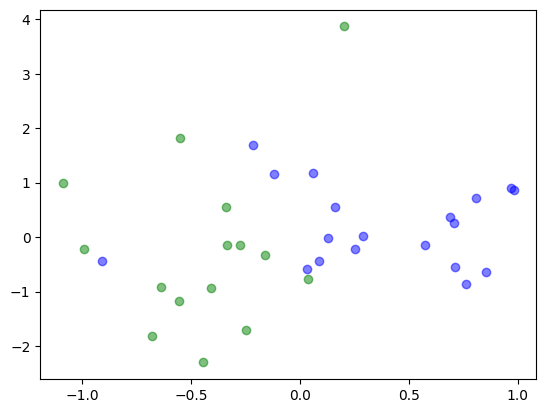

In [414]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform KMeans clustering on the embeddings
kmeans = KMeans(n_clusters=num_clusters).fit(z.cpu().detach().numpy())

# Plot the clusters 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(num_clusters):
    plt.scatter(z[kmeans.labels_ == i, 0].cpu().detach().numpy(),
                z[kmeans.labels_ == i, 1].cpu().detach().numpy(),
                c=colors[i % len(colors)], alpha=0.5)
plt.show()


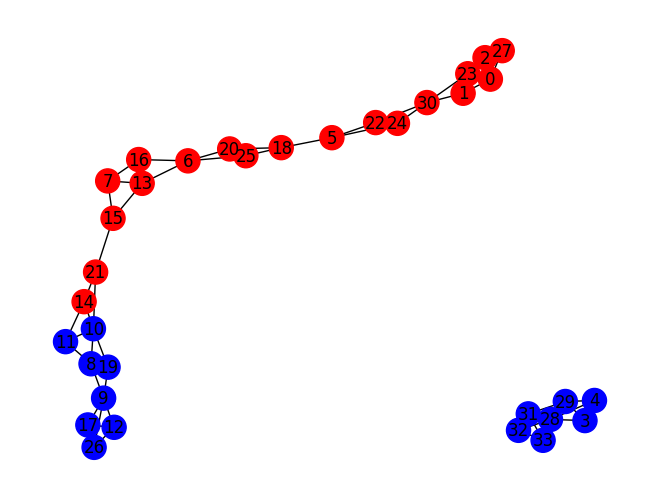

In [428]:
clusters = kmeans.labels_

# # Print the nodes and their assigned clusters
# for i in range(len(G.nodes)):
#     print("Node", i, "belongs to cluster", clusters[i])

colors = ["red" if c == 0 else "blue" if c == 1 else "green" for c in clusters]

# Plot the graph with the nodes colored based on the clusters
nx.draw(G, with_labels=True, node_color=colors)
plt.show()